In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [86]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [87]:
torch.manual_seed(42)
observations = 2048
train_data = torch.zeros((observations, 2))
train_data[:, 0] = 50 * torch.rand(observations)
train_data[:,1] = 1.08**train_data[:,0]

In [88]:
train_data.shape

torch.Size([2048, 2])

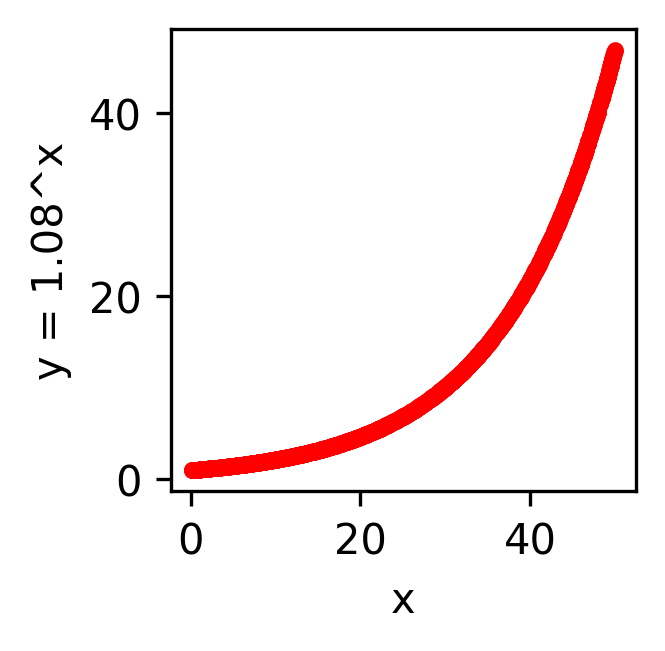

In [89]:
fig = plt.figure(dpi = 300, figsize = (2,2))
plt.plot(train_data[:,0], train_data[:,1],'.',c='r')
plt.xlabel('x')
plt.ylabel('y = 1.08^x')
plt.show()

In [90]:
device = 'GPU' if torch.cuda.is_available() else 'cpu'

In [91]:
batch_size = 128

real_labels = torch.ones((batch_size,1))
real_labels = real_labels.to(device)
fake_labels = torch.zeros((batch_size,1))
fake_labels = fake_labels.to(device)

In [92]:
print(real_labels.shape, fake_labels.shape)

torch.Size([128, 1]) torch.Size([128, 1])


In [93]:
from torch.utils.data import DataLoader
train_set_loader = DataLoader(
    train_data,
    batch_size = batch_size,
    shuffle = True,
)

In [94]:
train_set_loader

In [95]:
device

'cpu'

In [96]:
discriminator = nn.Sequential(
    nn.Linear(2, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(64, 1),
    nn.Sigmoid()
).to(device)

In [97]:
generator = nn.Sequential(
    nn.Linear(2, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 2)
).to(device)

In [98]:
learning_rate = 0.005
loss_fn = nn.BCELoss()
optim_disc = torch.optim.Adam(discriminator.parameters(), lr = learning_rate)
optim_gen = torch.optim.Adam(generator.parameters(), lr = learning_rate)

In [99]:
def train_disc_on_real_data(real_samples):
    real_samples = real_samples.to(device)
    optim_disc.zero_grad()
    pred_disc = discriminator(real_samples)
    loss_disc = loss_fn(pred_disc, real_labels)
    loss_disc.backward()
    optim_disc.step()
    return loss_disc

In [100]:
def train_disc_on_gen_fake_data():
    latent_space = torch.randn((batch_size, 2))
    latent_space = latent_space.to(device)
    fake_samples_by_gen = generator(latent_space)
    optim_disc.zero_grad()
    pred_disc = discriminator(fake_samples_by_gen)
    loss_disc = loss_fn(pred_disc, fake_labels)
    loss_disc.backward()
    optim_disc.step()
    return loss_disc
    

In [101]:
def train_gen():
    latent_space = torch.randn((batch_size, 2))
    latent_space = latent_space.to(device)
    optim_gen.zero_grad()
    fake_samples = generator(latent_space)
    preds = discriminator(fake_samples)
    loss_gen = loss_fn(preds, real_labels)
    loss_gen.backward()
    optim_gen.step()
    return loss_gen, fake_samples
    

In [105]:
def test_epoch(epoch, loss_gen, loss_disc, n, fake_samples):
    if(epoch ==0 or (epoch+1)%25 == 0):
        g_epoch_loss = loss_gen.item()/n
        d_epoch_loss = loss_disc.item()/n
        print(f'at epoch {epoch+1}, generator loss : {g_epoch_loss}, discriminator loss : {d_epoch_loss}')
        fake = fake_samples.detach().cpu().numpy()
        fig = plt.figure(dpi = 100, figsize = (1.5,1.5))
        plt.plot(fake[:,0], fake[:,1],'.',c='g', label="generated samples")
        plt.plot(train_data[:,0],train_data[:,1],".",c="r", alpha=0.1,label="real samples")
        plt.xlabel('x')
        plt.ylabel('y = ~1.08^x')
        plt.show()
        

In [103]:
mse=nn.MSELoss()
def performance(fake_samples):
    real=1.08**fake_samples[:,0]
    mseloss=mse(fake_samples[:,1],real)
    return mseloss

at epoch 1, generator loss : 1.5406514485677083, discriminator loss : 1.0658823013305665


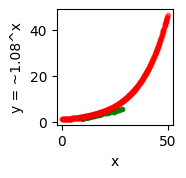

at epoch 25, generator loss : 0.8589382171630859, discriminator loss : 1.4579179128011068


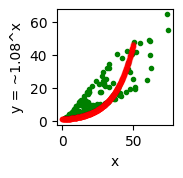

at epoch 50, generator loss : 0.8740982055664063, discriminator loss : 1.3391536712646483


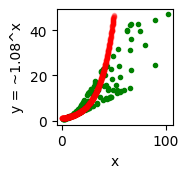

at epoch 75, generator loss : 0.754362678527832, discriminator loss : 1.3248156229654948


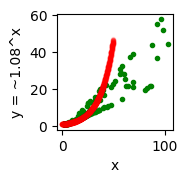

at epoch 100, generator loss : 0.7466225306193034, discriminator loss : 1.469538116455078


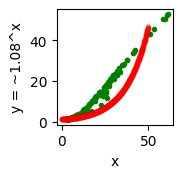

at epoch 125, generator loss : 0.7466684341430664, discriminator loss : 1.4786668141682944


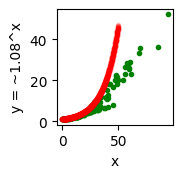

at epoch 150, generator loss : 0.7402977625528971, discriminator loss : 1.478778076171875


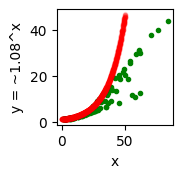

at epoch 175, generator loss : 0.7388736089070638, discriminator loss : 1.47841796875


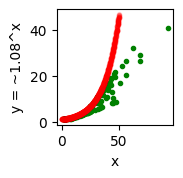

at epoch 200, generator loss : 0.7400573094685873, discriminator loss : 1.478872299194336


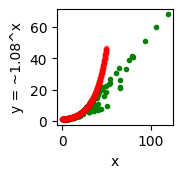

at epoch 225, generator loss : 0.739329719543457, discriminator loss : 1.4786940256754557


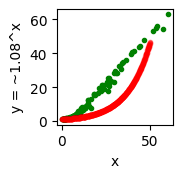

at epoch 250, generator loss : 0.7392529805501302, discriminator loss : 1.4791102091471353


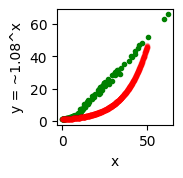

at epoch 275, generator loss : 0.7394832611083985, discriminator loss : 1.478857167561849


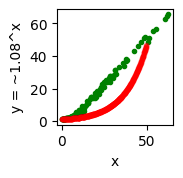

at epoch 300, generator loss : 0.7398998896280925, discriminator loss : 1.4788134256998697


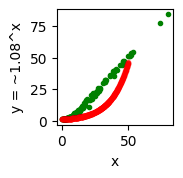

at epoch 325, generator loss : 0.7409631093343099, discriminator loss : 1.4787596384684245


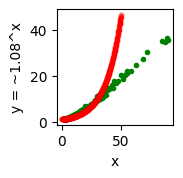

at epoch 350, generator loss : 0.7400702794392904, discriminator loss : 1.4789232889811197


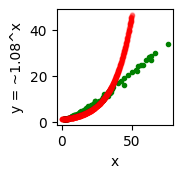

at epoch 375, generator loss : 0.7408098220825196, discriminator loss : 1.4793577829996745


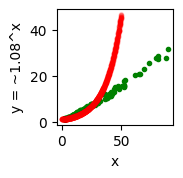

at epoch 400, generator loss : 0.7432343165079752, discriminator loss : 1.4788908640543619


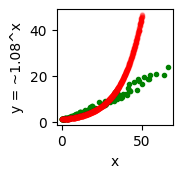

at epoch 425, generator loss : 0.7401964823404948, discriminator loss : 1.477850850423177


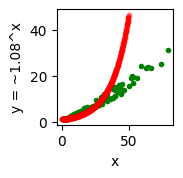

at epoch 450, generator loss : 0.7397597630818685, discriminator loss : 1.4789465586344401


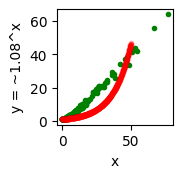

at epoch 475, generator loss : 0.7406571070353191, discriminator loss : 1.4790857950846354


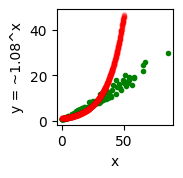

at epoch 500, generator loss : 0.7393666585286458, discriminator loss : 1.4789273579915365


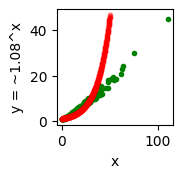

at epoch 525, generator loss : 0.7397462209065755, discriminator loss : 1.4787762959798176


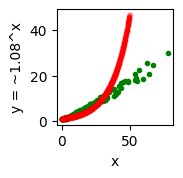

at epoch 550, generator loss : 0.739313252766927, discriminator loss : 1.4788607279459636


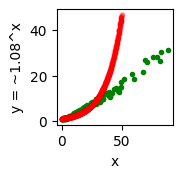

at epoch 575, generator loss : 0.7392459233601888, discriminator loss : 1.4790037790934245


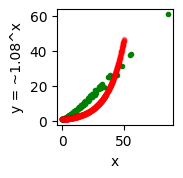

at epoch 600, generator loss : 0.7435089747111002, discriminator loss : 1.478708521525065


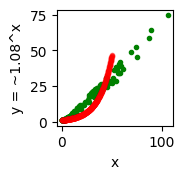

at epoch 625, generator loss : 0.7512060801188151, discriminator loss : 1.4704566955566407


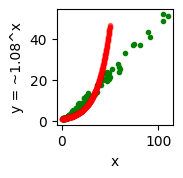

at epoch 650, generator loss : 0.7413681666056315, discriminator loss : 1.4788365681966147


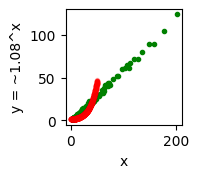

at epoch 675, generator loss : 0.7394866943359375, discriminator loss : 1.47886962890625


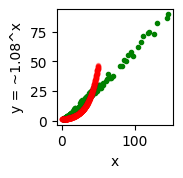

at epoch 700, generator loss : 0.7394667943318685, discriminator loss : 1.478860855102539


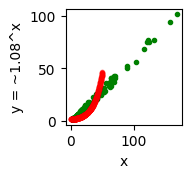

at epoch 725, generator loss : 0.7393588383992513, discriminator loss : 1.4788570404052734


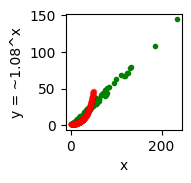

at epoch 750, generator loss : 0.7393885294596354, discriminator loss : 1.4788458506266275


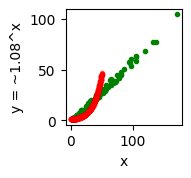

at epoch 775, generator loss : 0.7394011815388998, discriminator loss : 1.4788580576578776


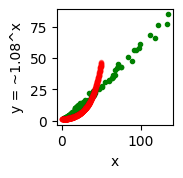

at epoch 800, generator loss : 0.7391571044921875, discriminator loss : 1.478818130493164


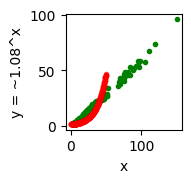

at epoch 825, generator loss : 0.7392710367838542, discriminator loss : 1.4787150065104167


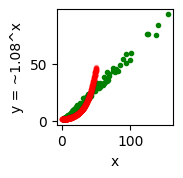

at epoch 850, generator loss : 0.7398522059122722, discriminator loss : 1.478847122192383


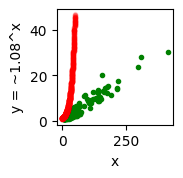

at epoch 875, generator loss : 0.7396393458048502, discriminator loss : 1.4788921356201172


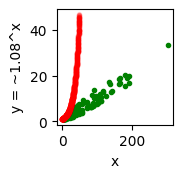

at epoch 900, generator loss : 0.7391079584757487, discriminator loss : 1.4789623260498046


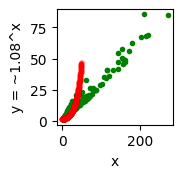

at epoch 925, generator loss : 0.7388605117797852, discriminator loss : 1.4789777119954428


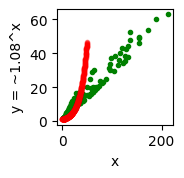

at epoch 950, generator loss : 0.7393181482950847, discriminator loss : 1.4789485931396484


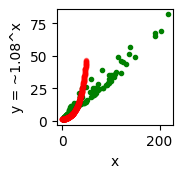

at epoch 975, generator loss : 0.7391222635904948, discriminator loss : 1.4788678487141926


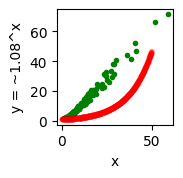

at epoch 1000, generator loss : 0.7355261484781901, discriminator loss : 1.4771270751953125


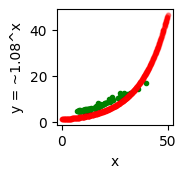

In [106]:
for epoch in range(1000):
    loss_overall_gen = 0
    loss_overall_disc = 0
    for n, real_samples in enumerate(train_set_loader):
        loss_disc = train_disc_on_real_data(real_samples)
        loss_overall_disc += loss_disc
        loss_disc = train_disc_on_gen_fake_data()
        loss_overall_disc += loss_disc
        loss_gen, fake_samples = train_gen()
        loss_overall_gen += loss_gen
    test_epoch(epoch, loss_overall_gen, loss_overall_disc, n, fake_samples)
    g_diff = performance(fake_samples).item()
    